,Turma,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,TamTurma
PLANTAS I,E,4.922727,4.813793,4.966667,4.763333,5.000000,4.996667,4.800000,5.000000,4.833333,4.836000,4.775000,89.0
MAMÍFEROS I,A,4.511538,4.992593,4.996296,4.874074,4.877778,4.892000,4.918519,4.988889,4.833333,4.925926,4.992593,82.0
MAMÍFEROS II,U,4.134615,3.475000,4.938462,3.996552,4.553333,4.615385,4.442857,4.935714,4.030769,4.275000,4.935714,90.0
DINOSSAUROS II,U,4.500000,4.905556,4.605556,4.511111,4.300000,4.538889,4.766667,4.438889,4.194444,4.476471,4.744444,60.0


,Turma,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11
PLANTAS I,E,4.923,4.814,4.967,4.763,5.000,4.997,4.800,5.000,4.833,4.836,4.775
MAMÍFEROS I,A,4.512,4.993,4.996,4.874,4.878,4.892,4.919,4.989,4.833,4.926,4.993
MAMÍFEROS II,U,4.135,3.475,4.938,3.997,4.553,4.615,4.443,4.936,4.031,4.275,4.936
DINOSSAUROS II,U,4.500,4.906,4.606,4.511,4.300,4.539,4.767,4.439,4.194,4.476,4.744


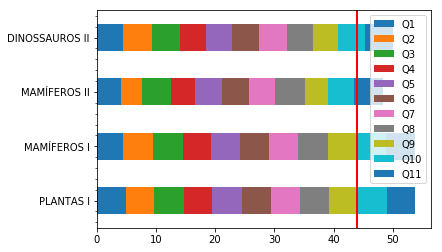

In [7]:
#import numpy as np
from IPython.display import display
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('AvalDiscente_20xx-x.csv', sep=';', error_bad_lines=False)
header = list(df.columns.values)  # list with column names

for h in header[2:-1]:
    # replaces NaN values with None
    df[h][df[h].isnull()] = None
    # replaces commas with dots for floats
    df[h] = df[h].str.replace(",", ".")
    # converts everything to float
    df[h] = df[h].astype(float)
    # df[h].apply(lambda(x): ((float(x)) if (type(x) == str)))


## group question results by subject and class ##
df_disc_turma = df.groupby(['Disciplina', 'Turma'])
mean_disc_turma = {}
for group in df_disc_turma:
    # assigns to key (subjects, class) the mean value of each question
    mean_disc_turma[group[0]] = group[1].mean() 

## creates new dataframe to hold means only ##
header.pop(0) # header sem disciplina porque disciplina vai ser index
df_disc_turma = pd.DataFrame(columns=header)
i = 0
for key, value in mean_disc_turma:
    valores = []
    # makes a list of all mean values
    valores.append(value) # e aqui começa a gambiarra pra usar as disciplinas como index
    for v in mean_disc_turma[(key, value)]:
        valores.append(v)
    # concatenates with the key
    #valores = [key, value] + valores ANTIGO
    # new row for each class
    #df_disc_turma.loc[i] = valores ANTIGO
    df_disc_turma.loc[key] = valores
    i += 1

plt.figure()
fig,ax= plt.subplots()
plt.minorticks_on()
ax.tick_params(axis='x',which='minor',bottom='off')
ax.axvline(x=44, linewidth=2, color='r')

#df_disc_turma.index.name = 'Disciplinas' # serve pra usar como label do y
df_disc_turma_sem_tamTurma = df_disc_turma.copy()
del df_disc_turma_sem_tamTurma['TamTurma']
if __name__ == "__main__":
    #print(df)
    #print(df_disc_turma)
    df_disc_turma_sem_tamTurma.plot(kind = 'barh', ax=ax, stacked=True)
    #df_disc_turma.plot.barh(x=df_disc_turma['Turma'], stacked=True)
    display(df_disc_turma)
    display(df_disc_turma_sem_tamTurma.round(3))
    
    plt.show()
